## Obesity Level Prediction
Random Forest Classification

## Data Preprocessing
The first step of building a model is to preprocess the obtained dataset that will be used for training and evaluating the model. This steps include importing the data, summarizing the data, finding the missing values, data imputation if there is any missing values. All of these steps produce an outcome dataset which is clean and ready for further procedures.

## Importing Dependencies

In [1]:
import pandas as pd

## Data Loading

In [84]:
data = pd.read_excel("obesity.xlsx")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,Normal
2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

In [86]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity                           0
dtype: int64

In [87]:
data.Obesity.unique()

array(['Overweight_Level_II', 'Normal', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [88]:
data.Gender = [1 if value == "Male" else 0 for value in data.Gender]
# Define a dictionary to map categories to numerical values
category_mapping = {'Insufficient_Weight': 0, 'Normal': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,'Obesity_Type_I':4,
                   'Obesity_Type_II':5, 'Obesity_Type_III':6}

# Use the map function to apply the mapping to the column
data.Obesity = data.Obesity.map(category_mapping)

In [89]:
data.Obesity.unique()

array([3, 1, 0, 6, 5, 2, 4], dtype=int64)

<Axes: xlabel='Obesity'>

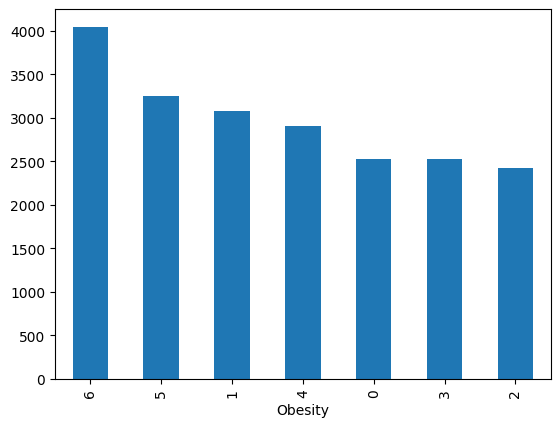

In [90]:
data.Obesity.value_counts().plot(kind = "bar")

In [9]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,6
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,3


In [91]:
data["Obesity"] = data['Obesity'].astype("category", copy = False)
data.Obesity.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20758 entries, 0 to 20757
Series name: Obesity
Non-Null Count  Dtype   
--------------  -----   
20758 non-null  category
dtypes: category(1)
memory usage: 20.7 KB


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          20758 non-null  int64   
 1   Age                             20758 non-null  float64 
 2   Height                          20758 non-null  float64 
 3   Weight                          20758 non-null  float64 
 4   family_history_with_overweight  20758 non-null  int64   
 5   FAVC                            20758 non-null  int64   
 6   FCVC                            20758 non-null  float64 
 7   NCP                             20758 non-null  float64 
 8   CAEC                            20758 non-null  object  
 9   SMOKE                           20758 non-null  int64   
 10  CH2O                            20758 non-null  float64 
 11  SCC                             20758 non-null  int64   
 12  FAF               

In [93]:
data.CALC.unique()

array(['Sometimes', 0, 'Frequently'], dtype=object)

In [94]:
data["family_history_with_overweight"] = data['family_history_with_overweight'].astype("category", copy = False)
data.family_history_with_overweight.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20758 entries, 0 to 20757
Series name: family_history_with_overweight
Non-Null Count  Dtype   
--------------  -----   
20758 non-null  category
dtypes: category(1)
memory usage: 20.5 KB


In [95]:
data["FAVC"] = data['FAVC'].astype("category", copy = False)
data.FAVC.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20758 entries, 0 to 20757
Series name: FAVC
Non-Null Count  Dtype   
--------------  -----   
20758 non-null  category
dtypes: category(1)
memory usage: 20.5 KB


In [96]:
category_mapping = {'Sometimes': 1, 'Frequently': 2, 'Always': 3, 0:0}

# Use the map function to apply the mapping to the column
data.CAEC = data.CAEC.map(category_mapping)

In [97]:
# Define a dictionary to map categories to numerical values
category_mapping = {'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 3, 'Bike':4}

# Use the map function to apply the mapping to the column
data.MTRANS = data.MTRANS.map(category_mapping)

In [99]:
# Define a dictionary to map categories to numerical values
category_mapping = {'Sometimes': 1, 0:0, 'Frequently': 2}

# Use the map function to apply the mapping to the column
data.CALC = data.CALC.map(category_mapping)

In [100]:
data.CALC.unique()

array([1, 0, 2], dtype=int64)

In [101]:
cat = ['SMOKE', 'SCC', 'CALC', 'MTRANS']
data[cat] = data[cat].astype("category", copy = False)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          20758 non-null  int64   
 1   Age                             20758 non-null  float64 
 2   Height                          20758 non-null  float64 
 3   Weight                          20758 non-null  float64 
 4   family_history_with_overweight  20758 non-null  category
 5   FAVC                            20758 non-null  category
 6   FCVC                            20758 non-null  float64 
 7   NCP                             20758 non-null  float64 
 8   CAEC                            20758 non-null  int64   
 9   SMOKE                           20758 non-null  category
 10  CH2O                            20758 non-null  float64 
 11  SCC                             20758 non-null  category
 12  FAF               

## Splitting the Dataset into Predictors and Target
Now we need to divide our dataset into predictors and target variables. Predictors are the columns or variables that our model will use for training and predicting the target values. Target is the column/variable that the model will try to predict with using the predictors. In our case, the column "Obesity" is the target variable and the other variables are predictors. We will denote target with Y and predictors with X.

In [119]:
X = data.drop(["Obesity"], axis = 1)
y = data["Obesity"]

## Data Standardization / Normalization

In [120]:
from sklearn.preprocessing import StandardScaler
# Creating a Scaler Object
scaler = StandardScaler()

# Fitting the Scaler into the Dataset and Data Transformation
X_scaled = scaler.fit_transform(X)

## Splitting the Dataset into Training and Testing Dataset

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=42)

## Model Building

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [123]:
clf = RandomForestClassifier()

In [124]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
print(clf.feature_importances_)

[0.07316174 0.0996275  0.09810944 0.38691631 0.02613029 0.0111631
 0.0870658  0.02950695 0.02430549 0.00095456 0.04445275 0.00465556
 0.03597479 0.04406702 0.02099982 0.01290888]


In [126]:
y_pred = clf.predict(X_test)
print(y_pred)

[6 2 4 ... 4 3 3]


## Evaluating Model Accuracy

In [129]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.90


This indicated this model can classify the obesity level of a person using a Random Forest Classification with an accuracy of 90%

## Classification Report

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       524
           1       0.85      0.89      0.87       626
           2       0.78      0.76      0.77       484
           3       0.80      0.79      0.79       514
           4       0.88      0.87      0.88       543
           5       0.97      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

